**TASK 4 : SENTIMENT ANALYSIS**

The task is to analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.


**DATASET**
https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

The dataset used here is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral.

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

data=pd.read_csv('/content/twitter_training.csv')

In [ ]:
data.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


Reading the data from the CSV file again, but this time with the specified column names and stores it in a DataFrame named df.

In [ ]:
col_names = ['ID','Entity','Sentiment','Content']
df = pd.read_csv('/content/twitter_training.csv',names=col_names)

In [ ]:
df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.shape

(68432, 4)

Get basic statistics of data.

In [ ]:
df.describe

<bound method NDFrame.describe of          ID         Entity Sentiment  \
0      2401    Borderlands  Positive   
1      2401    Borderlands  Positive   
2      2401    Borderlands  Positive   
3      2401    Borderlands  Positive   
4      2401    Borderlands  Positive   
...     ...            ...       ...   
68427  3717  Cyberpunk2077  Positive   
68428  3717  Cyberpunk2077  Positive   
68429  3717  Cyberpunk2077  Positive   
68430  3718  Cyberpunk2077  Positive   
68431  3718  Cyberpunk2077  Positive   

                                                 Content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
68427                                 LETS N GOOOOOOOOOO  
68428                 she LETS IN FUCKING OF GOOOOOOOOOO  
68429                                    LETS FUCKING LI  
68430                  I can’t wait for this to come out  
68431                                  I can't wait for   

[68432 rows x 4 columns]>

Checking for data types and missing values.

In [ ]:
df.isnull().sum()



ID             0
Entity         0
Sentiment      0
Content      602
dtype: int64

In [ ]:
df.dtypes

ID            int64
Entity       object
Sentiment    object
Content      object
dtype: object

**HANDLING MISSING VALUES**

Drops rows with missing values


In [ ]:

df.dropna(axis=0 , inplace=True)

In [ ]:
df.isnull().sum()


ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

Check for Duplicate values and prints the sum of duplicates , Then remove duplicates from the DataFrame

In [ ]:

df.duplicated().sum()

2174

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(65656, 4)

We count the occurences of each sentiment category category in the"Sentiment" Column

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Negative      20072
Positive      17722
Neutral       15770
Irrelevant    12092
Name: Sentiment, dtype: int64

Plots a bar chart showing the distribution of sentiments

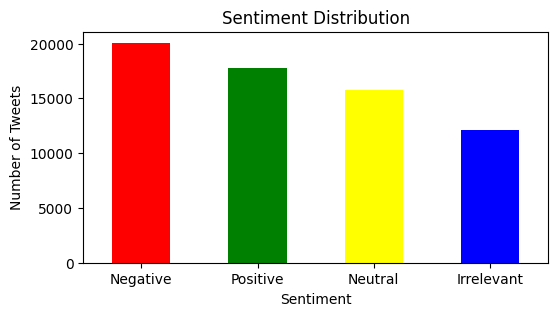

In [ ]:

plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'yellow', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

Filtering Data for a Specific Brand ( Here it is Microsoft)

In [ ]:
brand_data = df[df['Entity'].str.contains('Microsoft', case=False)]
brand_sentiment_counts = brand_data['Sentiment'].value_counts()
brand_sentiment_counts

Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: Sentiment, dtype: int64

Plotting Sentiment Distribution for Microsoft

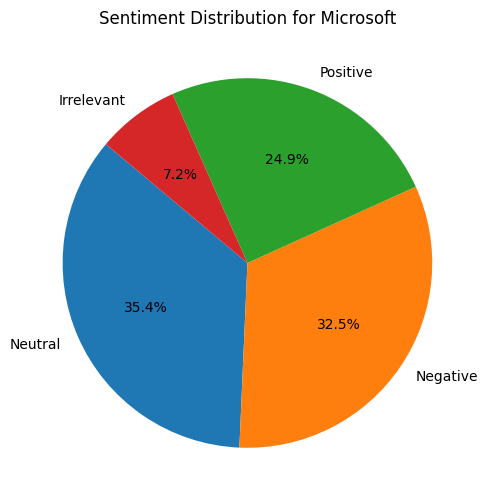

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Microsoft')
plt.show()

**Word Frequency Analysis**

In [ ]:
from collections import Counter
from wordcloud import WordCloud

In [ ]:
sentiment = 'Positive'  # or 'Negative', 'Neutral', depending on which sentiment you want to analyze
words = ' '.join(df[df['Sentiment'] == sentiment]['Content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

In [ ]:
def plot_word_frequency(sentiment):
    words = ' '.join(df[df['Sentiment'] == sentiment]['Content'])
    word_freq = Counter(words.split())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)


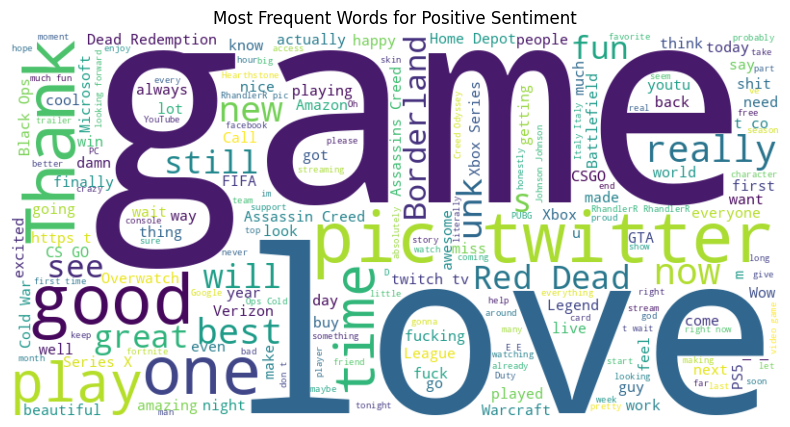

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Most Frequent Words for {sentiment} Sentiment')
plt.axis('off')
plt.show()

**Entity-specific Sentiment Analysis**

<Figure size 1200x600 with 0 Axes>

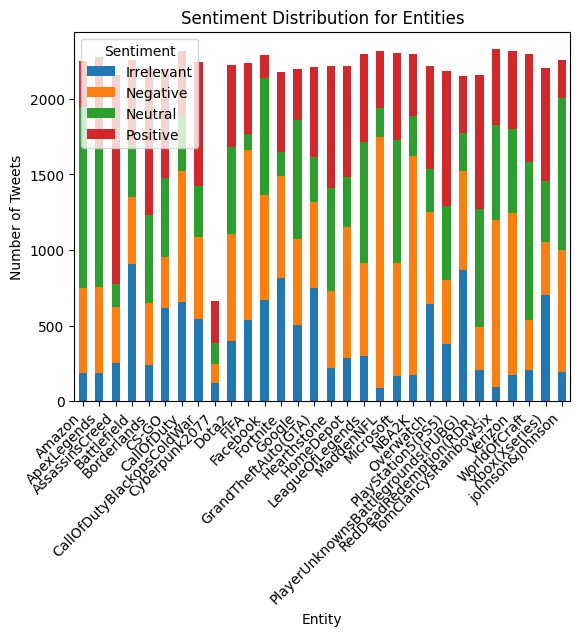

In [ ]:
entity_sentiment_counts = df.groupby('Entity')['Sentiment'].value_counts().unstack().fillna(0)

plt.figure(figsize=(12, 6))
entity_sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution for Entities')
plt.xlabel('Entity')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.xticks(rotation=45, ha='right')
plt.show()

**Sentiment Correlation Analysis**

In [ ]:
df['Tweet_Length'] = df['Content'].apply(len)


In [ ]:
print(df['Tweet_Length'])

0        53
1        51
2        50
3        51
4        57
         ..
68427    18
68428    34
68429    15
68430    33
68431    17
Name: Tweet_Length, Length: 65656, dtype: int64


In [ ]:
df.head(400)

,ID,Entity,Sentiment,Content,Tweet_Length
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
410,2469,Borderlands,Positive,"Great casting for ""Lilit,"" the most anticipate...",52
411,2469,Borderlands,Positive,"Perfect casting powers Lilith, most anticipate...",52
412,2469,Borderlands,Positive,"Perfect casting for first Lilith, most anticip...",55
413,2469,Borderlands,Positive,"Perfect Time for Lilith, most anticipated film",46


In [ ]:
retweets_df = df[df['Content'].str.startswith('RT @')]

In [ ]:
retweets_df

,ID,Entity,Sentiment,Content,Tweet_Length
5088,75,Amazon,Neutral,RT @richardturrin: Amazon and Goldman partner....,251
5089,75,Amazon,Neutral,RT @ richardturrin: Amazon and Goldman partner...,269
5090,75,Amazon,Neutral,RT @ richardturrin: Amazon and Goldman Sachs p...,245
5091,75,Amazon,Neutral,RT @richardturrin: Amazon and Goldman<unk>. Pe...,196
5092,75,Amazon,Neutral,RT @richardturrin : Team Amazon and Goldman pa...,305
5093,75,Amazon,Neutral,RT @richardturrin: Amazon partners Facebook pa...,217
5766,192,Amazon,Neutral,RT @CBinsights: Is,20
5767,192,Amazon,Neutral,RT @ CBinsights: Is,19
5768,192,Amazon,Neutral,RT @ CBInsights: Yes,20
44712,11679,Verizon,Irrelevant,RT @verizon: Many students depend on school fo...,228


In [ ]:
import seaborn as sns

<ipython-input-29-518189460aea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retweets_df.rename(columns={'Tweet_Length': 'Retweet_Tweet_Length'}, inplace=True)
<ipython-input-29-518189460aea>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df[['Sentiment', 'Tweet_Length', 'Retweet_Tweet_Length']].corr()


     ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             Content  Tweet_Length  \
0  im getting on borderlands and i will murder yo...            53   
1  I am coming to the borders and I will kill you...            51   
2  im getting on borderlands and i will kill you ...            50   
3  im coming on borderlands and i will murder you...            51   
4  im getting on borderlands 2 and i will murder ...            57   

   Retweet_Tweet_Length  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  


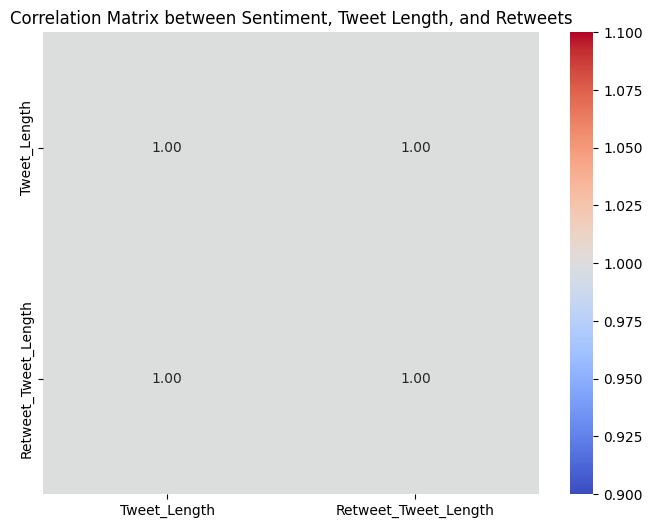

In [ ]:
# Rename the columns in retweets_df before merging
retweets_df.rename(columns={'Tweet_Length': 'Retweet_Tweet_Length'}, inplace=True)

# Merge the two DataFrames based on common columns 'ID', 'Entity', 'Sentiment', and 'Content'
merged_df = pd.merge(df, retweets_df, on=['ID', 'Entity', 'Sentiment', 'Content'], how='outer')

# Verify the structure of the merged DataFrame
print(merged_df.head())  # Print the first few rows to check the structure

# Calculate the correlation matrix
correlation_matrix = merged_df[['Sentiment', 'Tweet_Length', 'Retweet_Tweet_Length']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Sentiment, Tweet Length, and Retweets')
plt.show()

* This analysis involves exploring a dataset of tweets related to various entities and their associated sentiment. The dataset contains four columns: ID, Entity, Sentiment, and Content. Here is a summary of the analysis:

* The first few rows of the dataset were displayed using the head() function, which showed that the tweets were related to the video game "Borderlands" and had a positive sentiment.

* The sentiment distribution for the entire dataset was calculated using the value_counts() function, which showed that there were more positive tweets than negative or neutral ones.

* The sentiment distribution for a specific entity (Microsoft) was calculated using the value_counts() function and plotted as a pie chart.

* The most frequent words for positive sentiment were visualized using a word cloud.

* The correlation matrix between sentiment, tweet length, and retweets was calculated and visualized using a heatmap.

* The tweet length was calculated by applying the len() function to the 'Content' column using the apply() method.

* Retweets were filtered out by selecting rows where the 'Content' column starts with "RT @".

* The two dataframes (one containing all tweets and the other containing retweets) were merged based on common columns 'ID', 'Entity', 'Sentiment', and 'Content'.

* The correlation matrix was calculated using the corr() method on the merged dataframe.


Overall, the analysis suggests that the dataset contains more positive tweets than negative or neutral ones, and that the sentiment towards specific entities such as Microsoft is mostly positive. The correlation matrix suggests that there is a weak negative correlation between sentiment and tweet length, and a weak positive correlation between sentiment and retweet tweet length. The most frequent words for positive sentiment were also visualized using a word cloud.